<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Construcción y Comparación de Modelos de Clasificación

El objetivo de esta práctica es construir múltiples modelos de clasificación para predecir la probabilidad de que una transacción sea fraudulenta. Además de implementar los modelos, deberás analizar y comparar las métricas obtenidas para seleccionar el modelo que mejor se ajuste al problema. En este laboratorio deberás: 



- Entrenar al menos tres modelos diferentes de clasificación, como:

   - **Regresión logística**

   - **Árboles de decisión**

   - **Bosques aleatorios**

   - etc.


- Obtener las siguientes métricas para cada modelo:

   - Precisión

   - Recall (Sensibilidad)

   - F1-Score

   - Área bajo la curva ROC (AUC-ROC)

   - Matriz de confusión

   - Accuracy

- Visualizar y comparar estas métricas en gráficos claros y explicativos.


- Analizar las métricas de rendimiento de cada modelo.

- Justificar la selección del modelo más adecuado en función del equilibrio entre precisión y recall, así como la interpretación del área bajo la curva ROC.


In [2]:
%load_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_logistica_ensamble as sle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("datos/financial_data_target_ajustado.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,is_fraudulent,purchase_category,customer_age,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,location_City-1,...,location_City-46,location_City-47,location_City-48,location_City-49,location_City-5,location_City-50,location_City-6,location_City-7,location_City-8,location_City-9
0,0,1,1,0.486978,61,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,1,0.505313,59,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,4,1,0.513546,36,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5,1,0.524610,43,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,6,1,0.486978,19,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
soporte = sle.AnalisisModelosClasificacion(df, "is_fraudulent")
soporte.ajustar_modelo("logistic_regression")
soporte.calcular_metricas("logistic_regression")

c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,train,test
accuracy,0.534848,0.510101
precision,0.534801,0.511325
recall,0.534848,0.510101
f1,0.534584,0.510275
kappa,0.069449,0.020898
auc,0.548445,0.51496
time_seconds,0.005,NaN
n_jobs,None,NaN
modelo,logistic_regression,logistic_regression
tiempo_computacion(segundos),NaN,0.005


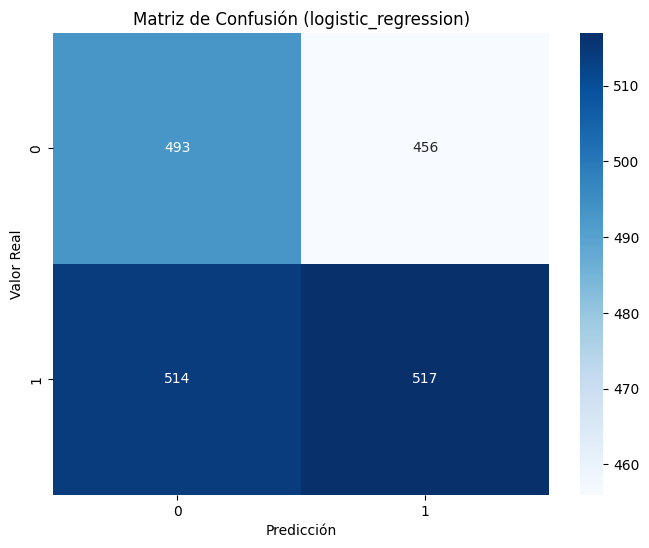

In [5]:
soporte.plot_matriz_confusion("logistic_regression")

c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


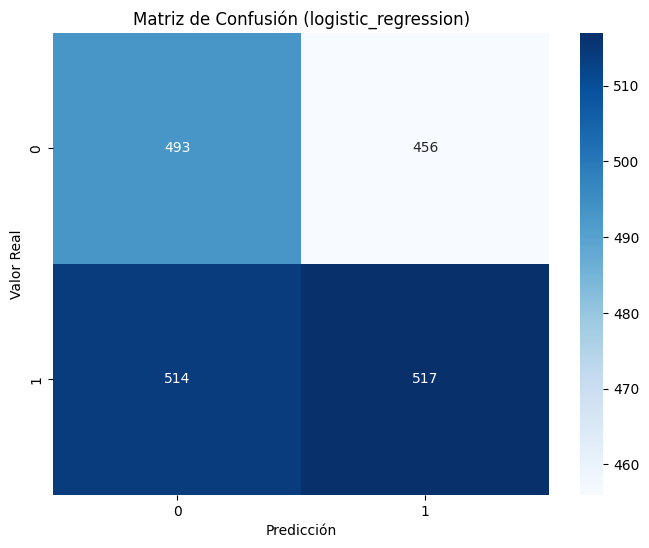

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo2\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


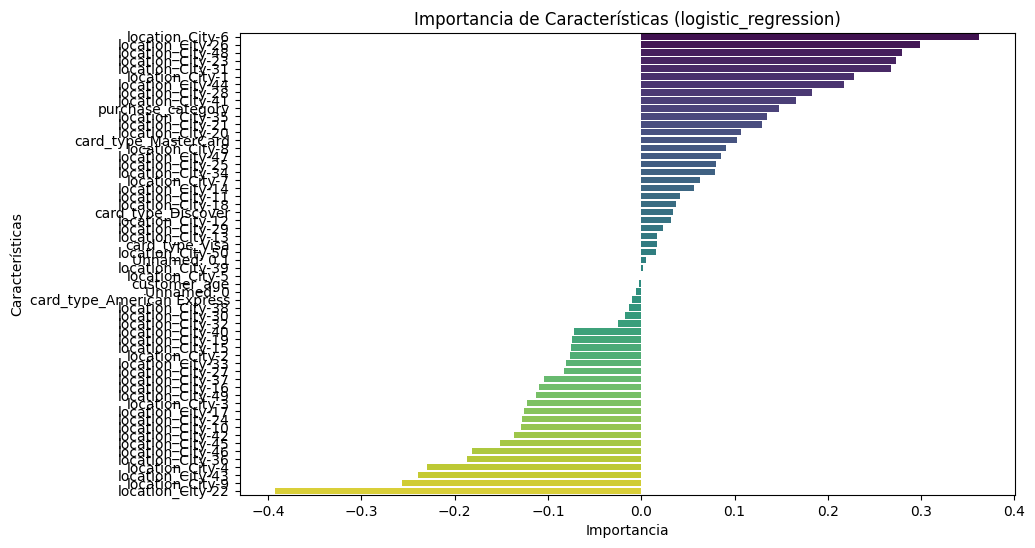

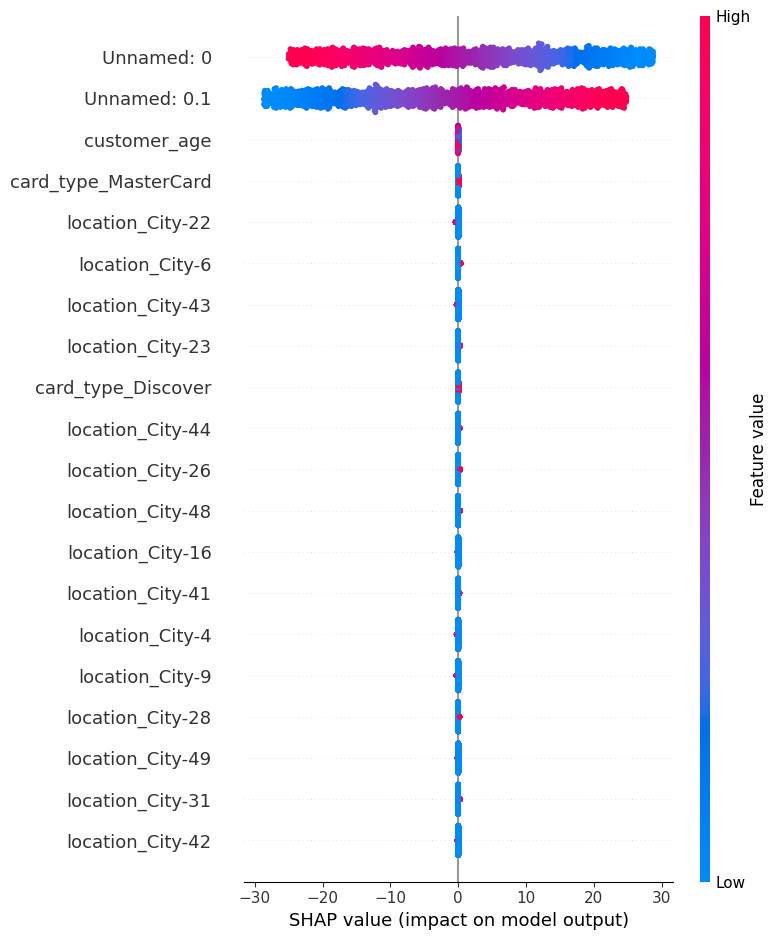

,train,test
accuracy,0.534848,0.510101
precision,0.534801,0.511325
recall,0.534848,0.510101
f1,0.534584,0.510275
kappa,0.069449,0.020898
auc,0.548445,0.51496
time_seconds,0.004192,NaN
n_jobs,None,NaN
modelo,logistic_regression,logistic_regression
tiempo_computacion(segundos),NaN,0.004192


El mejor modelo es DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5)


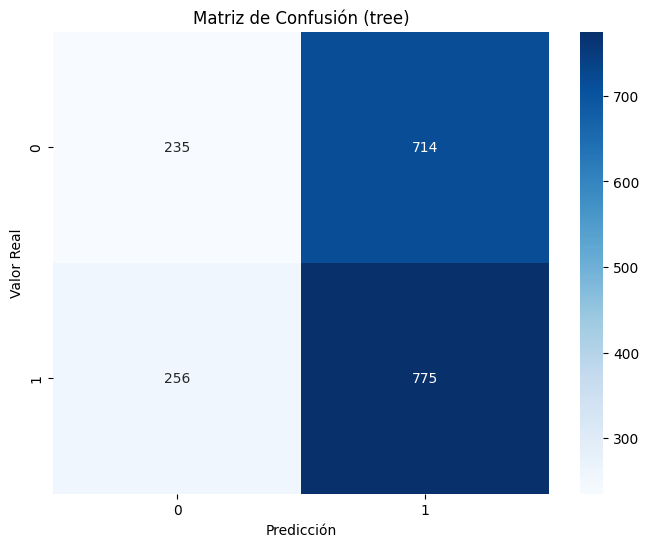

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo2\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


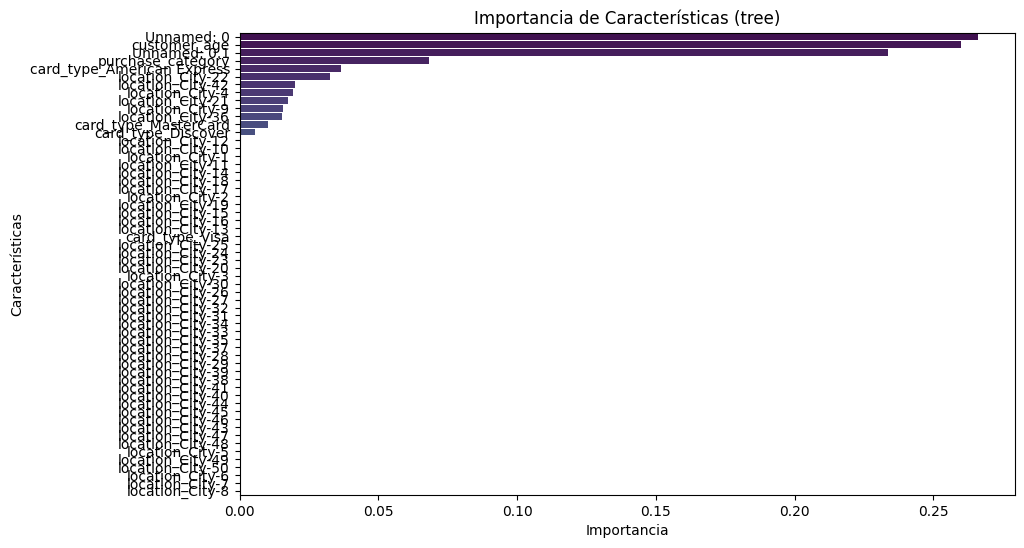

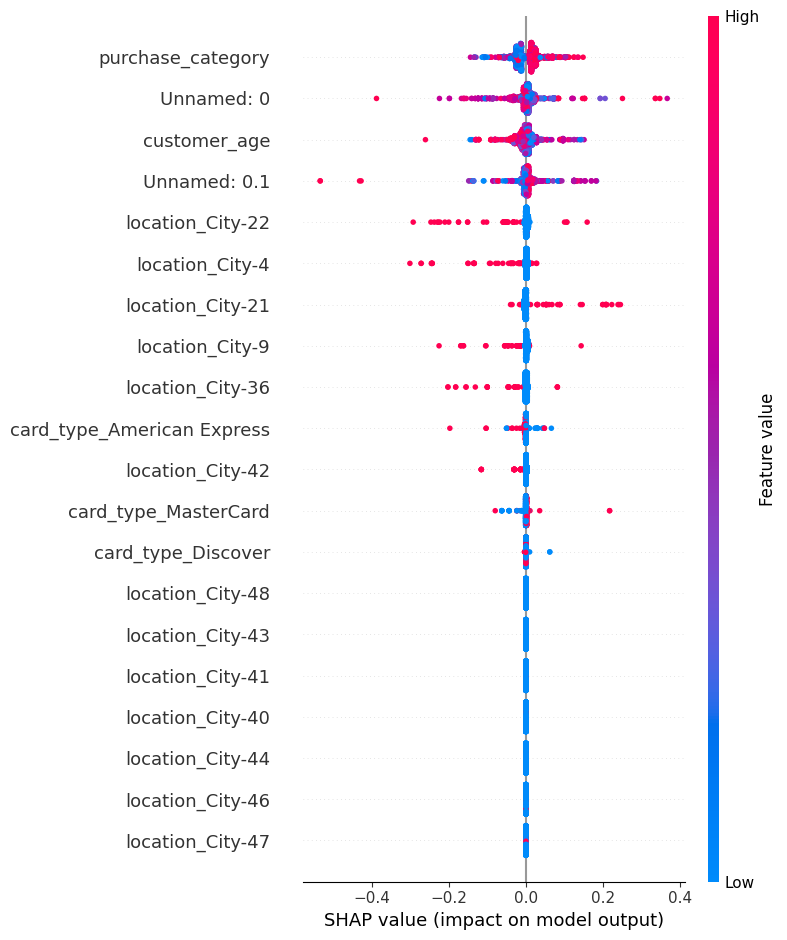

,train,test,train,test
accuracy,0.534848,0.510101,0.553157,0.510101
precision,0.534801,0.511325,0.56674,0.500416
recall,0.534848,0.510101,0.553157,0.510101
f1,0.534584,0.510275,0.526471,0.476712
kappa,0.069449,0.020898,0.103951,-0.000687
auc,0.548445,0.51496,0.575226,0.505226
time_seconds,0.004192,NaN,0.004003,NaN
n_jobs,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree
tiempo_computacion(segundos),NaN,0.004192,NaN,0.004003


c:\Users\ivigo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


El mejor modelo es RandomForestClassifier(max_depth=6, min_samples_split=5, n_estimators=50)


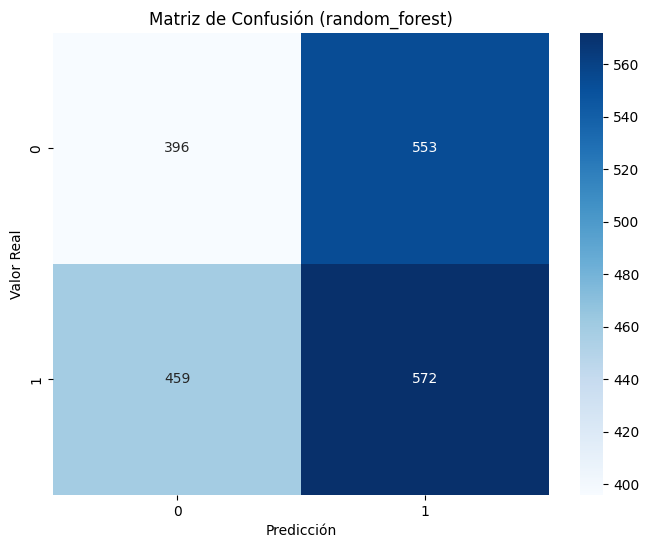

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo2\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


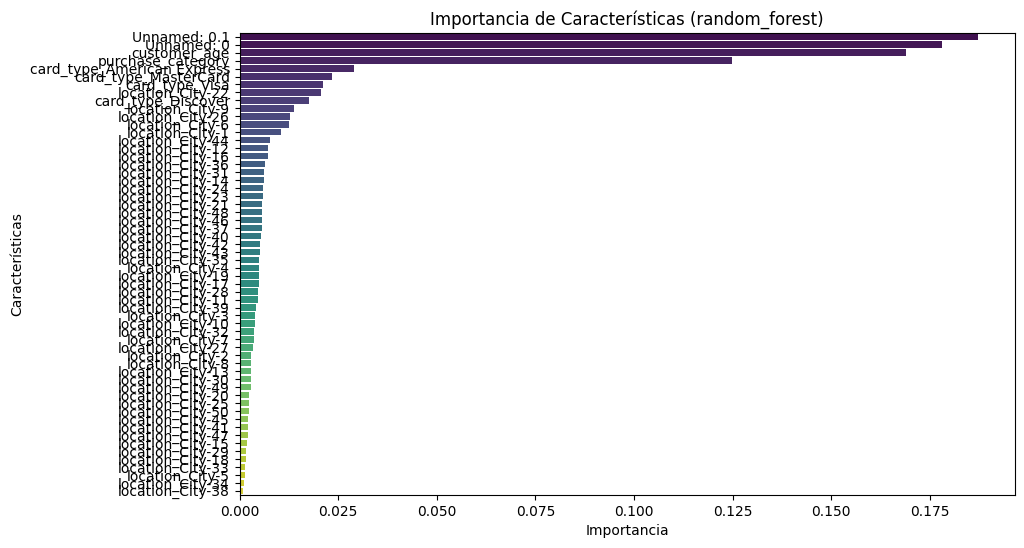

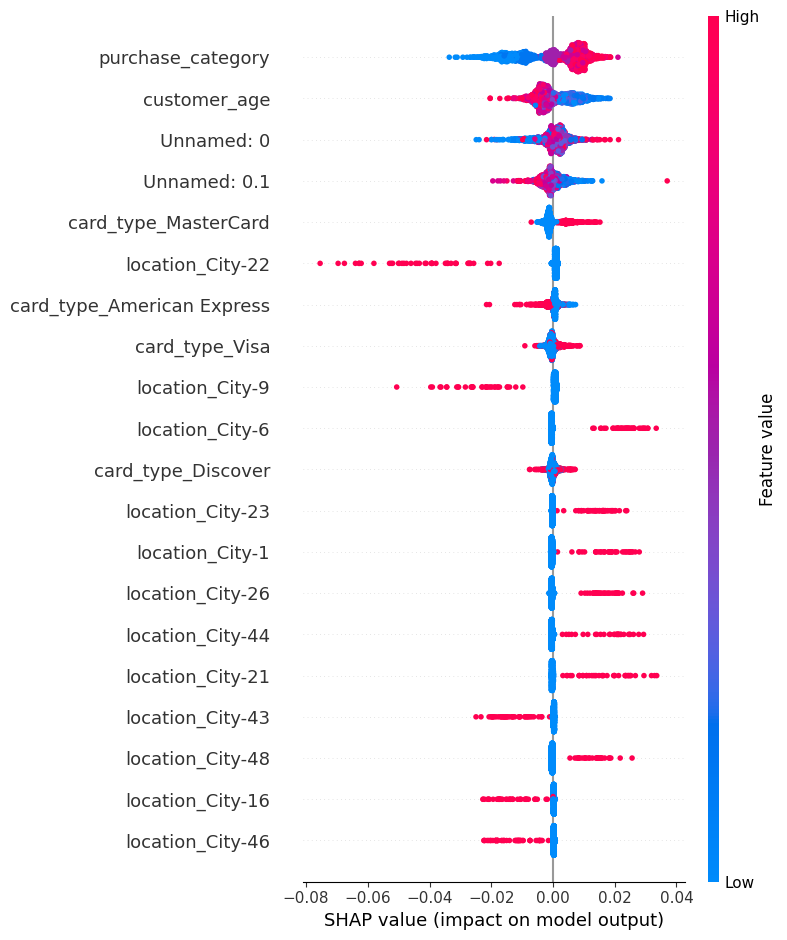

,train,test,train,test,train,test
accuracy,0.534848,0.510101,0.553157,0.510101,0.625884,0.488889
precision,0.534801,0.511325,0.56674,0.500416,0.62759,0.486739
recall,0.534848,0.510101,0.553157,0.510101,0.625884,0.488889
f1,0.534584,0.510275,0.526471,0.476712,0.62431,0.486715
kappa,0.069449,0.020898,0.103951,-0.000687,0.251229,-0.028028
auc,0.548445,0.51496,0.575226,0.505226,0.685301,0.489818
time_seconds,0.004192,NaN,0.004003,NaN,0.018553,NaN
n_jobs,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest
tiempo_computacion(segundos),NaN,0.004192,NaN,0.004003,NaN,0.018553


El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=2,
                           min_samples_split=5, n_estimators=200,
                           subsample=0.8)


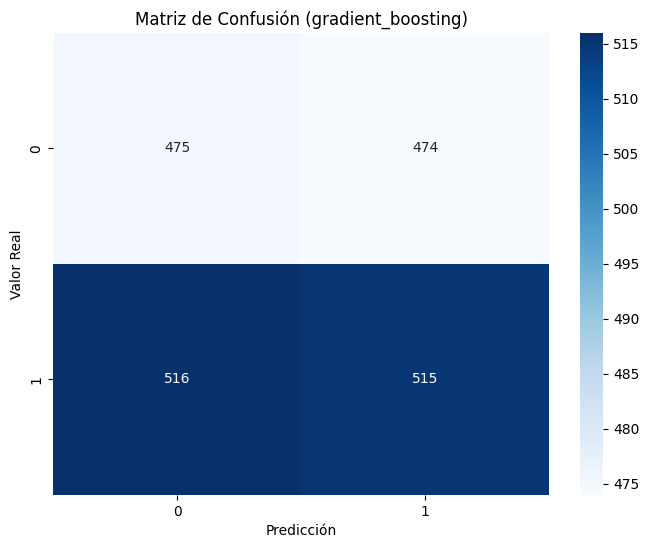

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo2\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


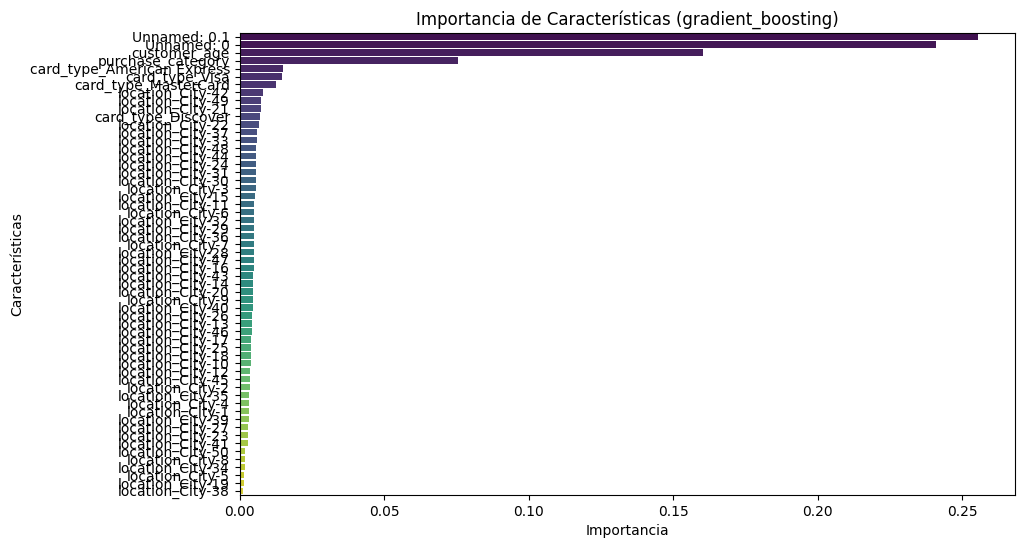

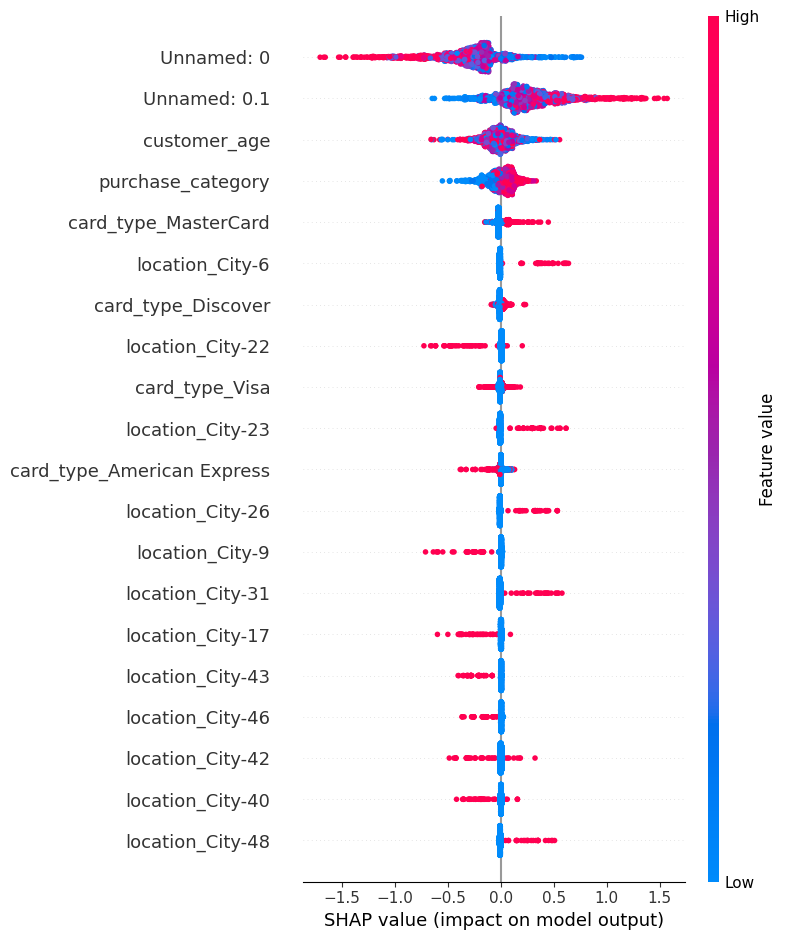

,train,test,train,test,train,test,train,test
accuracy,0.534848,0.510101,0.553157,0.510101,0.625884,0.488889,0.69697,0.5
precision,0.534801,0.511325,0.56674,0.500416,0.62759,0.486739,0.69701,0.500878
recall,0.534848,0.510101,0.553157,0.510101,0.625884,0.488889,0.69697,0.5
f1,0.534584,0.510275,0.526471,0.476712,0.62431,0.486715,0.696926,0.500214
kappa,0.069449,0.020898,0.103951,-0.000687,0.251229,-0.028028,0.393856,0.000042
auc,0.548445,0.51496,0.575226,0.505226,0.685301,0.489818,0.773834,0.496435
time_seconds,0.004192,NaN,0.004003,NaN,0.018553,NaN,0.018013,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting
tiempo_computacion(segundos),NaN,0.004192,NaN,0.004003,NaN,0.018553,NaN,0.018013


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


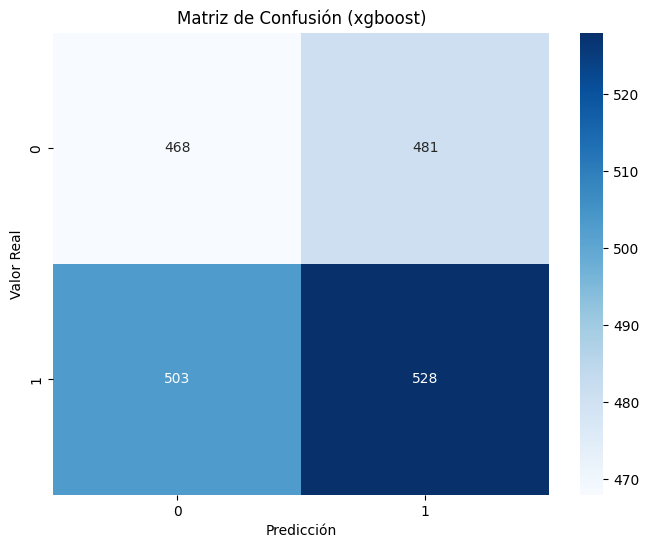

c:\Bravo\Hackio\Modulo8\labs\laboratorio-modulo8-logistica\modelos\modelo2\../..\src\soporte_logistica_ensamble.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


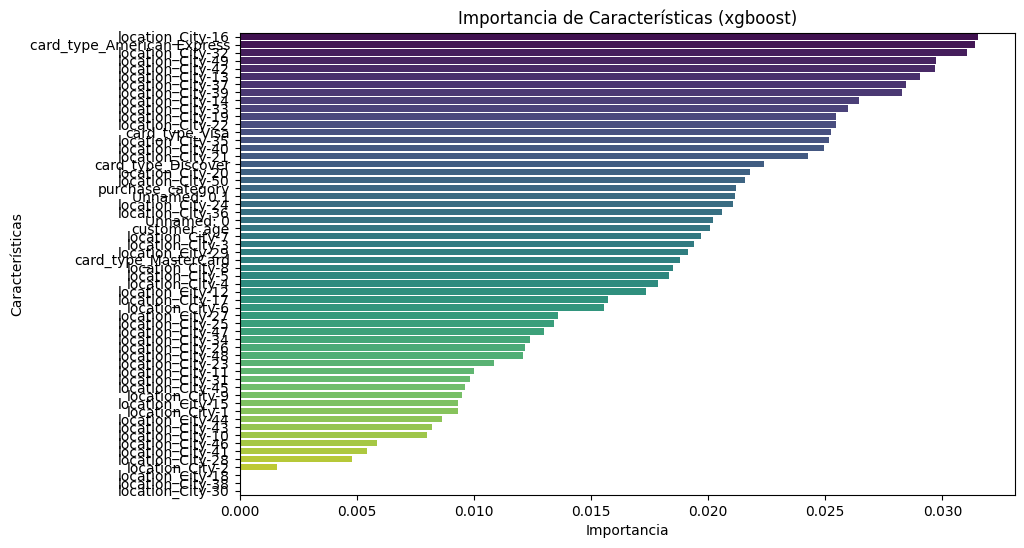

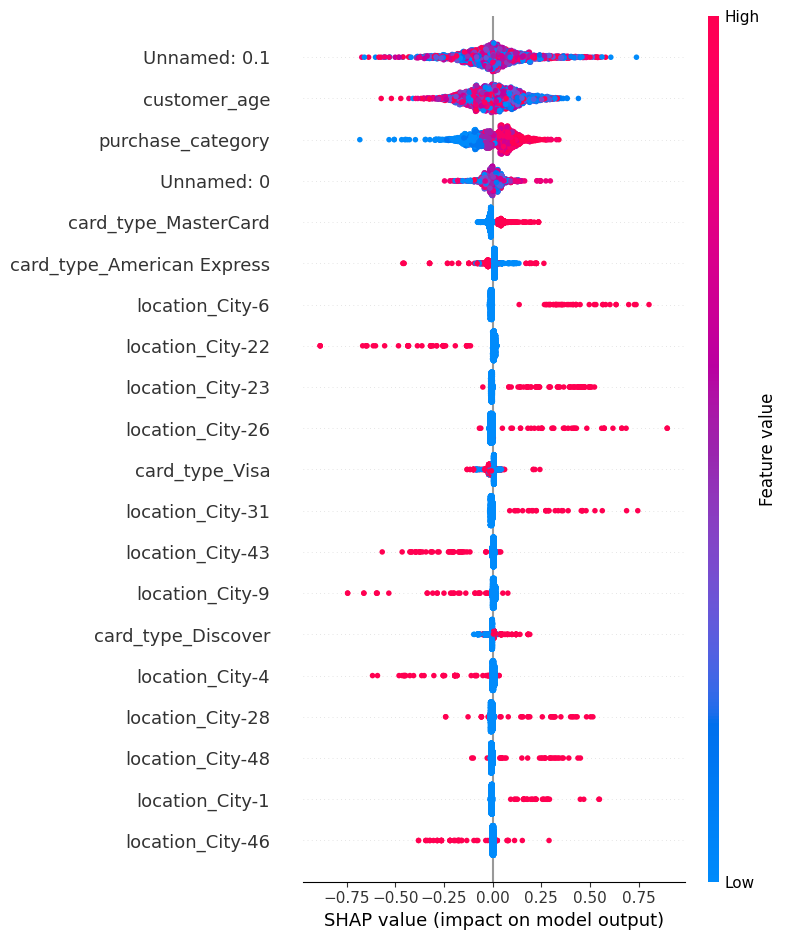

,train,test,train,test,train,test,train,test,train,test
accuracy,0.534848,0.510101,0.553157,0.510101,0.625884,0.488889,0.69697,0.5,0.649747,0.50303
precision,0.534801,0.511325,0.56674,0.500416,0.62759,0.486739,0.69701,0.500878,0.649774,0.503489
recall,0.534848,0.510101,0.553157,0.510101,0.625884,0.488889,0.69697,0.5,0.649747,0.50303
f1,0.534584,0.510275,0.526471,0.476712,0.62431,0.486715,0.696926,0.500214,0.649687,0.503198
kappa,0.069449,0.020898,0.103951,-0.000687,0.251229,-0.028028,0.393856,0.000042,0.299391,0.00527
auc,0.548445,0.51496,0.575226,0.505226,0.685301,0.489818,0.773834,0.496435,0.714186,0.503977
time_seconds,0.004192,NaN,0.004003,NaN,0.018553,NaN,0.018013,NaN,0.025426,NaN
n_jobs,None,NaN,16,NaN,None,NaN,16,NaN,None,NaN
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting,xgboost,xgboost
tiempo_computacion(segundos),NaN,0.004192,NaN,0.004003,NaN,0.018553,NaN,0.018013,NaN,0.025426


,accuracy,precision,recall,f1,kappa
train,0.534848,0.534801,0.534848,0.534584,0.069449
test,0.510101,0.511325,0.510101,0.510275,0.020898
train,0.553157,0.56674,0.553157,0.526471,0.103951
test,0.510101,0.500416,0.510101,0.476712,-0.000687
train,0.625884,0.62759,0.625884,0.62431,0.251229
test,0.488889,0.486739,0.488889,0.486715,-0.028028
train,0.69697,0.69701,0.69697,0.696926,0.393856
test,0.5,0.500878,0.5,0.500214,0.000042
train,0.649747,0.649774,0.649747,0.649687,0.299391
test,0.50303,0.503489,0.50303,0.503198,0.00527


In [6]:
lista_modelos = ["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"]
df_metricas = pd.DataFrame()
for modelo in lista_modelos:
    # soporte = sle.AnalisisModelosClasificacion(df, "is_fraudulent")
    soporte.ajustar_modelo(modelo)
    df_temp = soporte.calcular_metricas(modelo)
    df_metricas = pd.concat([df_metricas, df_temp], axis=1)
    soporte.plot_matriz_confusion(modelo)
    soporte.importancia_predictores(modelo)
    soporte.plot_shap_summary(modelo)
    display(df_metricas)
df_metricas.head().T

In [7]:
df_resultados_colores = df_metricas.T.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(sle.color_filas_por_modelo, axis=1)
df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo,tiempo_computacion(segundos),nucleos_usados
0,0.534848,0.534801,0.534848,0.534584,0.069449,0.548445,0.004192,None,logistic_regression,nan,nan
1,0.510101,0.511325,0.510101,0.510275,0.020898,0.514960,nan,nan,logistic_regression,0.004192,None
2,0.553157,0.566740,0.553157,0.526471,0.103951,0.575226,0.004003,16,tree,nan,nan
3,0.510101,0.500416,0.510101,0.476712,-0.000687,0.505226,nan,nan,tree,0.004003,16
4,0.625884,0.627590,0.625884,0.624310,0.251229,0.685301,0.018553,None,random_forest,nan,nan
5,0.488889,0.486739,0.488889,0.486715,-0.028028,0.489818,nan,nan,random_forest,0.018553,None
6,0.696970,0.697010,0.696970,0.696926,0.393856,0.773834,0.018013,16,gradient_boosting,nan,nan
7,0.500000,0.500878,0.500000,0.500214,0.000042,0.496435,nan,nan,gradient_boosting,0.018013,16
8,0.649747,0.649774,0.649747,0.649687,0.299391,0.714186,0.025426,None,xgboost,nan,nan
9,0.503030,0.503489,0.503030,0.503198,0.005270,0.503977,nan,nan,xgboost,0.025426,None


In [8]:
# with open('../../models/model_DecisionTreeRegressor2.pkl', 'wb') as file:
#     pickle.dump(soporte, file)